# Basics

In [46]:
from SOMcreator import Project,Object,Attribute,PropertySet

proj =Project("Testprojekt")
proj.clear()
proj.open("data/SOM MaKa.SOMjson")  #alternative: proj.import_excel("data/SOM MAKA.xlsx","SOM-MaKa")
print("Done")

Done


In [47]:
for obj in proj.objects:
    print(obj.name)

Abdichtung
Abdichtung
Absenkbausatz
Abspannvorrichtung
AndreaskreuzUndLichtzeichen
Anhebbausatz
Anker
Anprallschutz
Arbeitsgrube
Ausbau
Ausgleichsplatte
Ausleger
Ausruestung
Aussenschale
BE-Flaeche
BUEAnlage
BUEAnlageStrasse
BUEBedieneinrichtung
BUEEinschaltung
BUESpezifischesSignal
Bahnsteiganlage
Bahnsteigausbau
Bahnsteigausbaukomponente
Bahnsteige
Bahnsteigzugang
Bahnuebergaenge
Baubehelf
Baubruecke
Baugrund
Bautelleneinrichtung
Bauwerksaufhaengung
BauzeitlicheSicherungseinrichtung
Bebauung
Bedachungsbahnsteigfuss
Bedieneinrichtung Oertlich
Bedieneinrichtung Stellwerk
Bedienung und Steuerung
Befestigungselement
Betonwanne
Bettung
Binderschicht
Bodenart
Bodenplatte
Bodenschicht
Bogenabzug
Bohrpfahl
Bohrpfahlwand
Brillenwand
Bruecke
Brueckenplatte
Brueckentraeger
Brueckentragwerk
Deckschicht
Durchrutschweg
ETCSBalise
ETCSDatenpunkt
ETCSFachtelegramm
Eindeckung
Einfassungsrahmen
Eingleisstelle
Entwaesserung
Entwaesserungsgraben
Entwaesserungskanal
Entwaesserungsschacht
ErdKabel
ErdLeit

In [21]:
obj_dict: dict[str,Object] = {obj.ident_value:obj for obj in proj.objects}
obj_1 = obj_dict["br.ue"]
print(f"Objekt Name: {obj_1.name}")
print(f"Objekt ident: {obj_1.ident_value}")
print(f"Objekt Kürzel: {obj_1.abbreviation}")

Objekt Name: Ueberbau
Objekt ident: br.ue
Objekt Kürzel: UE


In [20]:
for property_set in obj_1.property_sets:
    print(f"Propertyset Name: {property_set.name}")
    print([attribute.name for attribute in property_set.attributes])
    print("-")

Propertyset Name: Allgemeine Eigenschaften
['nativeID', 'identitaet', 'eigentuemer', 'bemerkung', 'name', 'bauteilKlassifikation', 'bauteilName']
-------------------------
Propertyset Name: Gruppierung
['idGruppe']
-------------------------


In [19]:
pset_1 = obj_1.get_property_set_by_name("Allgemeine Eigenschaften")
attribute_1 = pset_1.get_attribute_by_name("bauteilKlassifikation")

print(f"name: {attribute_1.name}")
print(f"value: {attribute_1.value}")            # possible Values
print(f"data_type: {attribute_1.data_type}")    # xs:string;xs:double;xs:boolean,xs:int
print(f"value_type: {attribute_1.value_type}")  # List, Range, Format
                                                # List: checks if value is in given List
                                                # Range: checks if value is in given Range(s)
                                                # Format: checks if value matches Regular Expression


name: bauteilKlassifikation
value: ['br.ue']
data_type: xs:string
value_type: List


# Aggregation

In [40]:
aggregations = obj_1.aggregation_representations    #Object can only be placed in Aggregation Structure
print(aggregations)
aggregation = next(iter(aggregations))

{<SOMcreator.classes.Aggregation object at 0x0000015E92F51050>}


In [41]:
print(f"Element: {aggregation.name}")
print(f"Parent: {aggregation.parent.name}")
print(f"Children: {[child.name for child in aggregation.children]}")
print(f"Objekt: {aggregation.object}")
print(f"Parent connection: {aggregation.parent_connection}")            #1 = aggregation 2 = inheritance 3 = aggregation & inheritance



Element: Ueberbau
Parent: Bruecke
Children: ['Kappe', 'Brueckentragwerk']
Objekt: Object Ueberbau
Parent connection: 1


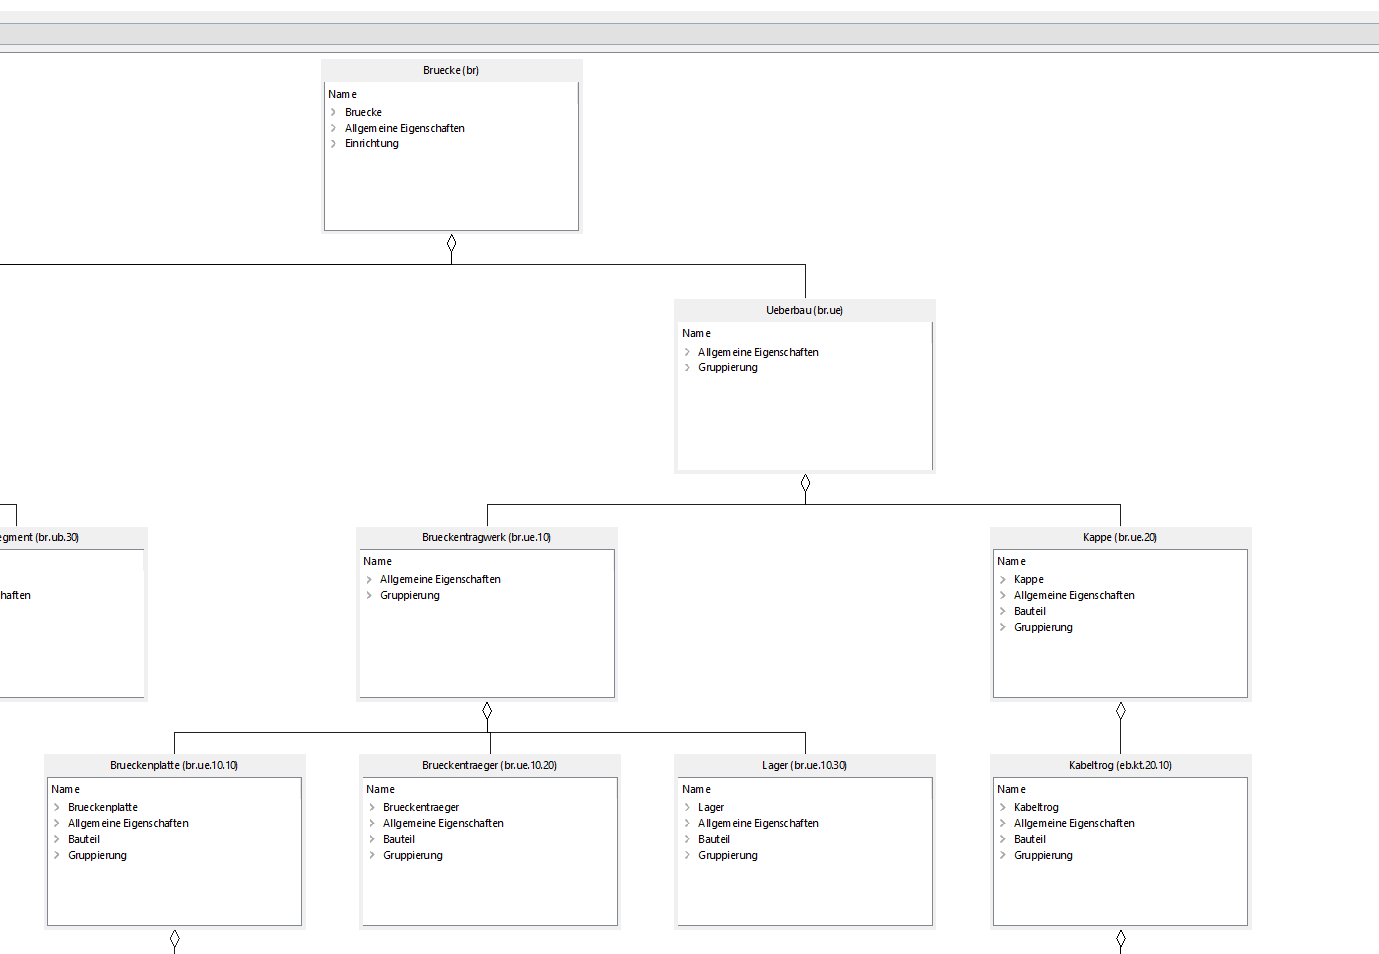

In [42]:
from IPython import display
display.Image("C:/Users/ChristophMellueh/Pictures/screenshots/aggreg.png")